# LOAN INTEREST RATE PREDICTION - Dimensionality Reduction
### Main notebook link: [Click here](Loan-Prediction.ipynb)
By Nohan Joemon

## Importing libraries and loading data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('train.csv')
dataset.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0


## Feature Selection methods:
#### 1: Missing value method: Remove features having large proportion of missing values
#### 2: Low Variance: Remove features having low variance
#### 3: High correlation: If two features have high correlation(close to 1), remove one of them
#### 4: Backward Elimination filter: < not covered in this notebook > Code is provided, but not executed due to computational difficulty
#### 5: Forward Elimination filter: < not covered in this notebook >  Code is provided, but not executed due to computational difficulty
## Feature Extraction methods:
#### < not covered in this notebook >

## 1: Missing value method

In [4]:
dataset.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

No missing values at all. Hence we cannot apply missing value method

## 2: Low variance method

In [5]:
#data type of variables
dataset.dtypes

Loan_ID                    int64
Loan_Amount_Requested      int64
Length_Employed            int64
Home_Owner                 int64
Annual_Income            float64
Income_Verified            int64
Purpose_Of_Loan            int64
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                     int64
Interest_Rate            float64
dtype: object

In [6]:
dataset = dataset.drop('Loan_ID', axis=1)
dataset.shape

(131447, 12)

In [10]:
from sklearn.preprocessing import normalize
normalize = normalize(dataset)
data_scaled = pd.DataFrame(normalize)
data_scaled.var()

0     8.158560e-07
1     6.759490e-07
2     1.441057e-13
3     5.134465e-14
4     3.607649e-05
5     6.648896e-15
6     5.635884e-14
7     6.054717e-13
8     1.046971e-14
9     2.452775e-13
10    1.316654e-12
11    2.012382e-15
12    5.361819e-15
dtype: float64

Here, all features except Loan Amount Requested and Annual Income have low variances. Hence it is better to not drop any features

## 3: High correlation method

<AxesSubplot:>

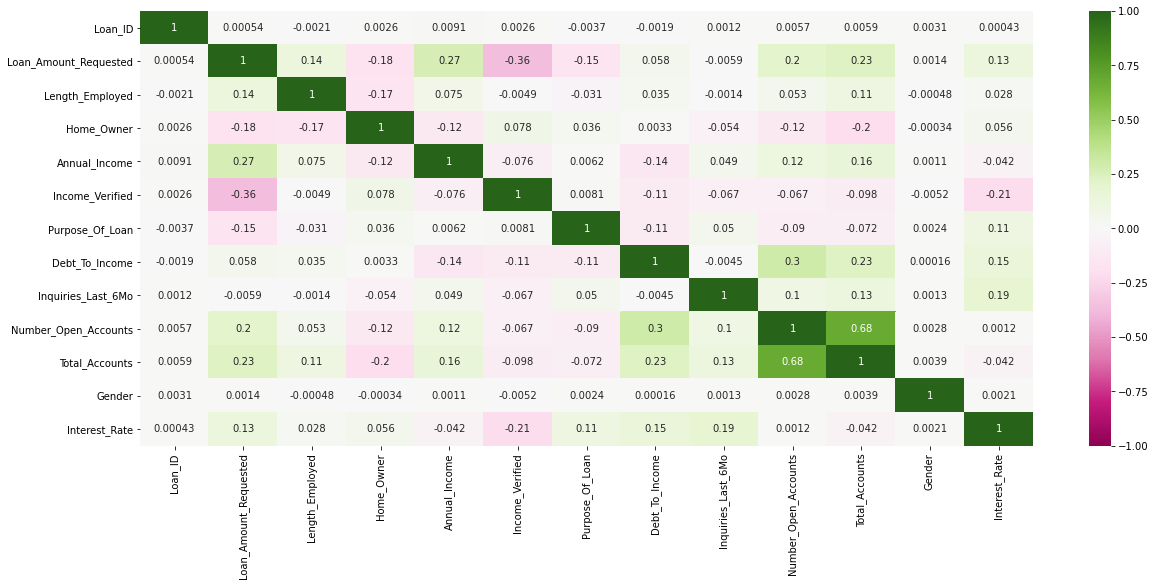

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(dataset.corr(),vmin=-1,cmap="PiYG",annot=True)

Number_Open_Accounts and Total_Accounts have a correlation of 0.68, hence we should consider dropping them. Among these two, Total_Accounts have more correlation, hence we should drop Number_Open_Accounts

## 4: Backward Elimination filter (Assume any model: eg: Logistic Regression)

In [7]:
# X = dataset.drop([ 'Interest_Rate'], axis=1)
# y = dataset['Interest_Rate']

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression # Assume we are using LogisticRegression Model

# lreg = LogisticRegression()
# sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='accuracy')
# sfs1 = sfs1.fit(X, y)
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

## 5: Forward Elimination filter  (Assume any model: eg: Logistic Regression)

In [8]:
# X = dataset.drop([ 'Interest_Rate'], axis=1)
# y = dataset['Interest_Rate']

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression # Assume we are using LogisticRegression Model

# lreg = LogisticRegression()
# sfs1 = sfs(lreg, k_features=2, forward=True, verbose=2, scoring='accuracy')
# sfs1 = sfs1.fit(X, y)
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

## Summary: Tried some methods of dimensionality reduction, but there is scope for better methods